# Regression Project Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn import metrics
import numpy as np

In [4]:
import pickle

In [5]:
df = pd.read_pickle('golden_data_dummy.pkl')

In [6]:
df.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [7]:
df.shape

(14990, 136)

In [ ]:
# df.corr() heatmap zor - 136 column var. Bu nedenle ...price column'un korelasyonu lazim

In [10]:
df.corr()['price']

displacement                  0.301022
hp                            0.696620
km                           -0.387911
ss_abs                       -0.045100
ss_adaptive_cruise_control    0.248674
                                ...   
type_Demonstration            0.253007
type_Employee's car           0.025844
type_New                      0.208214
type_Pre-registered           0.130463
type_Used                    -0.333761
Name: price, Length: 136, dtype: float64

In [12]:
df.corr()['price'].sort_values().head(10)

age                           -0.458475
gearing_type_Manual           -0.443354
km                            -0.387911
model_Corsa                   -0.379704
type_Used                     -0.333761
model_Clio                    -0.289587
make_Opel                     -0.232633
body_Compact                  -0.204352
model_Astra                   -0.125644
ent_media_on_board_computer   -0.091703
Name: price, dtype: float64

In [13]:
df.corr()['price'].sort_values().tail(10)

cc_park_distance_control            0.367997
ss_blind_spot_monitor               0.369862
ss_lane_departure_warning_system    0.372215
gearing_type_Automatic              0.398715
body_Van                            0.411899
cc_automatic_climate_control        0.415296
model_Espace                        0.437672
ss_led_headlights                   0.442480
hp                                  0.696620
price                               1.000000
Name: price, dtype: float64

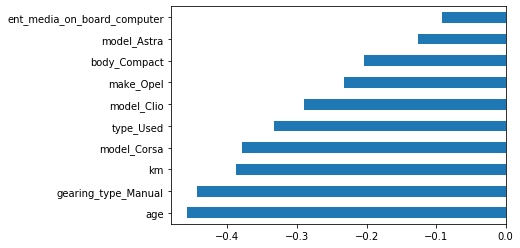

In [15]:
df.corr()['price'].sort_values().head(10).plot.barh();

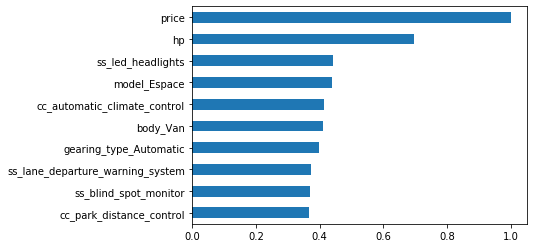

In [16]:
df.corr()['price'].sort_values().tail(10).plot.barh();

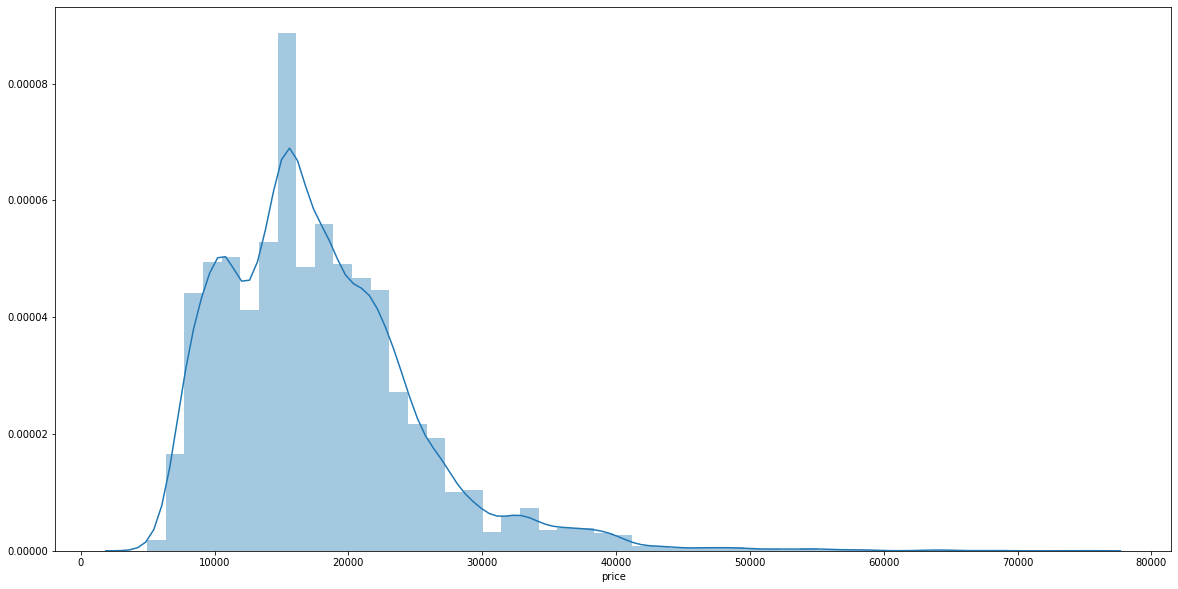

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(df.price);

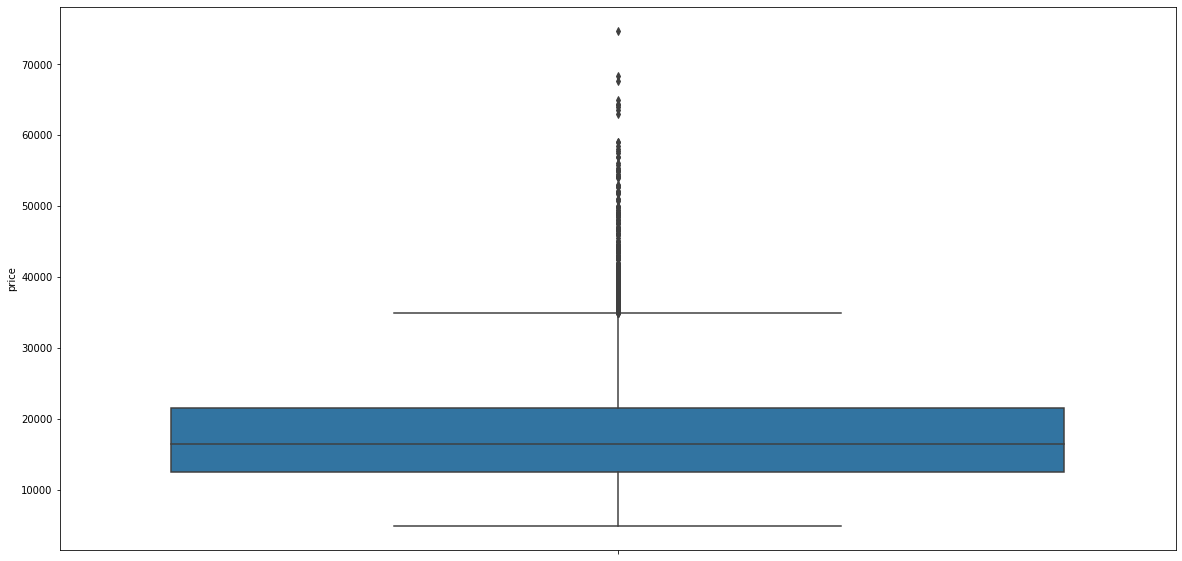

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(df.price, orient = 'v'); # outlier degiller - yuksek fiyatli arabalar

**1. Linear Regression**

In [20]:
X = df.drop(['price'], axis=1)

In [22]:
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
X.shape

(14990, 135)

In [26]:
X_train.shape

(11992, 135)

In [27]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = lm.predict(X_test)

In [32]:
eval_metrics(y_test, y_pred)

r2_score: 0.8841095188155331 
 mae: 1676.914543216925 
 mse: 5853681.21451456 
 rmse: 2419.438202251622


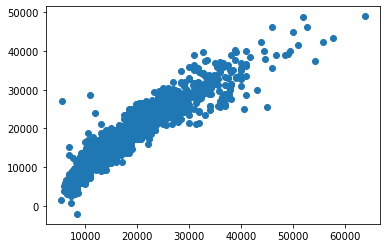

In [33]:
plt.scatter(y_test, y_pred);

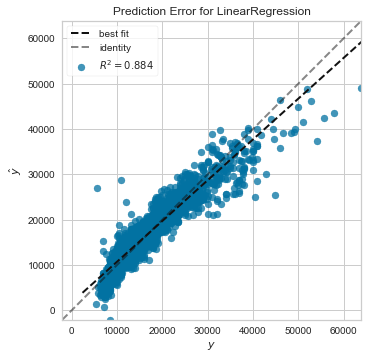

In [34]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

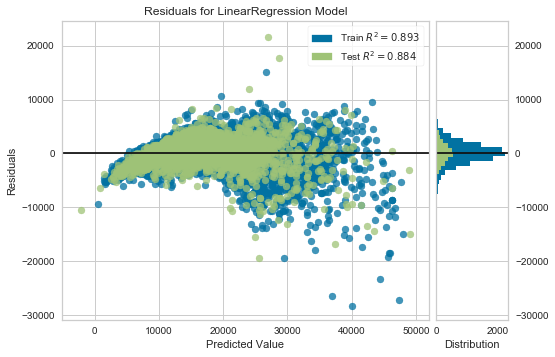

In [35]:
# Yellowbrick Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [36]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [37]:
compare.sample(10)

,Actual,Pred
5066,27089,26864.444261
9208,8500,7603.699819
12201,20350,21511.754353
1391,14980,14759.138048
5691,24999,25441.223259
3572,15970,17005.004313
10114,15190,18496.943643
5399,24950,23257.498305
12795,35490,25742.725618
3799,21490,21628.828053


In [38]:
comparison = {"Actual": y_test, "Model prediction": y_pred, "Diff": y_pred-y_test, 
              "Diff %": 100*(y_pred-y_test)/y_test}
comparison_df = pd.DataFrame(comparison).round(1)

In [41]:
comparison_df.sort_values('Diff', ascending = True).head(20)

,Actual,Model prediction,Diff,Diff %
12759,44970,25544.0,-19426.0,-43.2
15816,54205,37451.2,-16753.8,-30.9
12764,40533,25020.8,-15512.2,-38.3
3595,63900,49024.7,-14875.3,-23.3
15809,57800,43437.4,-14362.6,-24.8
15810,55800,42356.1,-13443.9,-24.1
12760,42995,30009.4,-12985.6,-30.2
13021,40990,28587.4,-12402.6,-30.3
12496,36990,25819.9,-11170.1,-30.2
12506,36900,26215.4,-10684.6,-29.0


In [39]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)
cv_scores.mean()

0.8882514694748049

In [40]:
cv_scores

array([0.88245545, 0.88550335, 0.89440368, 0.89082652, 0.88806834])

**2. Ridge Regression**

In [ ]:
# scaling yapilmayacak

In [42]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [43]:
ridge_model =  Ridge(normalize = True)

In [44]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [46]:
y_pred = ridge_model.predict(X_test)

In [47]:
eval_metrics(y_test, y_pred)

r2_score: 0.8254601392222487 
 mae: 2007.526774775591 
 mse: 8816088.204797711 
 rmse: 2969.189822964795


In [48]:
alpha_space = np.linspace(0.1, 20, 50)

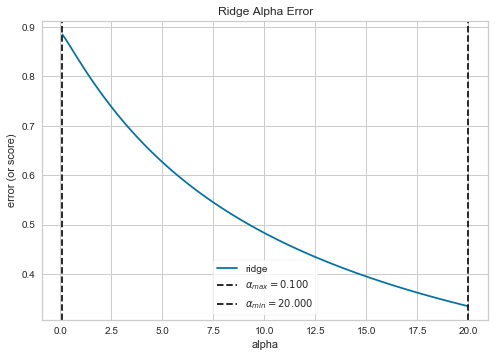

In [50]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [ ]:
# grafige gore, alpha 0'a yaklasinca, score maximize olacak. Bu nedenle, 0.01 secebiliriz

In [51]:
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.883098911849254 
 mae: 1662.1342716774182 
 mse: 5904727.434646731 
 rmse: 2429.964492466244


In [52]:
ridge_model = Ridge(0.01, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8845463540242824 
 mae: 1671.0573883090144 
 mse: 5831616.468306248 
 rmse: 2414.8740067146873


In [53]:
ridge_model = Ridge(20, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.3327299371881427 
 mae: 4427.604116444179 
 mse: 33704116.09105691 
 rmse: 5805.524618073453


**3. Lasso Regression**

In [54]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [55]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8797520522949478 
 mae: 1685.38942525692 
 mse: 6073778.841633961 
 rmse: 2464.5037718847097


In [56]:
alpha_space = np.linspace(0.1, 20, 500)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)

In [57]:
lasso_cv_model.alpha_

0.1

In [ ]:
# Ridge ile ayni sonuc

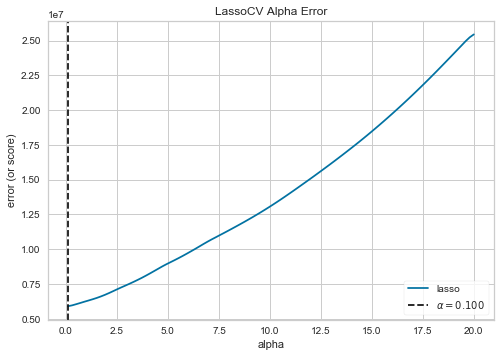

In [58]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [59]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8848624711824822 
 mae: 1668.380635170378 
 mse: 5815649.246049279 
 rmse: 2411.5657250113004


In [ ]:
# Lasso ile cok buyuk improvement yasanmadi

In [61]:
#Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [62]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

111

In [ ]:
# score dusmesine izin verirsek izin verilen column sayisi azalacak

In [63]:
lasso_model = Lasso(6, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.809747879984529 
 mae: 2141.7174373267217 
 mse: 9609721.605896657 
 rmse: 3099.9550974000667


In [64]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [65]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

17

In [66]:
significant_features.sort_values(by='coef', ascending=False)

,features,coef
99,model_Espace,4602.388172
90,make_Audi,3199.982806
59,cc_heads_up_display,1430.640957
21,ss_led_headlights,531.460811
130,type_Demonstration,438.593018
51,cc_automatic_climate_control,421.043768
1,hp,130.658609
22,ss_lane_departure_warning_system,40.437456
95,model_A3,28.823476
79,cc_seat_ventilation,27.632547


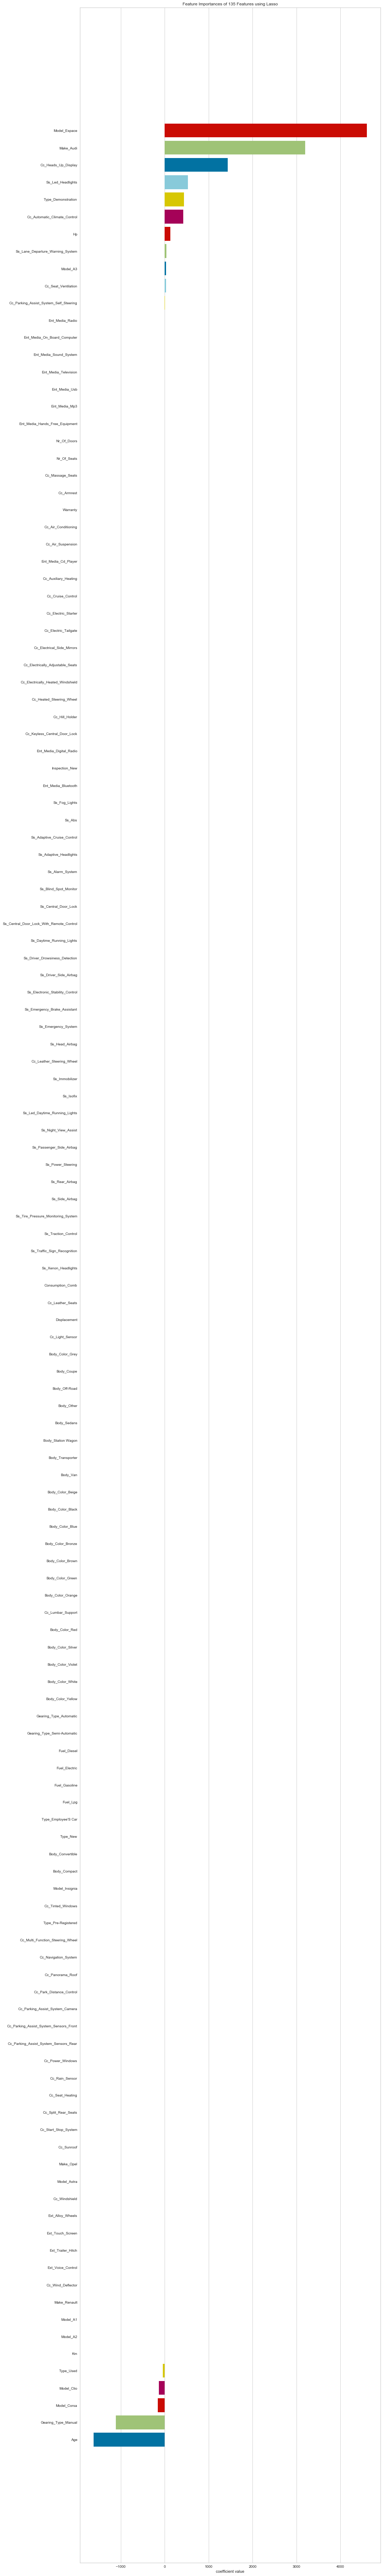

In [68]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Saving Sci-kit Learn Model**

In [69]:
df2=pd.read_pickle("golden_data_not_dummy.pkl")

In [70]:
df2.head(3)

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,body,body_color,gearing_type,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,fuel,nr_of_doors,nr_of_seats,type,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0,Audi,A1,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,Sedans,Black,Automatic,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,diesel,5.0,5.0,Used,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1798.0,Audi,A1,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,Sedans,Red,Automatic,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,gasoline,3.0,4.0,Used,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1598.0,Audi,A1,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,Sedans,Black,Automatic,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,diesel,4.0,4.0,Used,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [71]:
df2.shape

(14994, 98)

In [72]:
new_list=['hp', 'age', 'km', 'model']

In [73]:
X = df2[new_list]

In [75]:
X.head(3)

,hp,age,km,model
0,66.0,3,56013,A1
1,141.0,2,80000,A1
2,85.0,3,83450,A1


In [76]:
y = df2['price']

In [77]:
y.head(3)

0    15770
1    14500
2    14640
Name: price, dtype: int64

In [ ]:
# sadece 4 feature column'umuz var

In [78]:
X=pd.get_dummies(X)

In [79]:
X.head(3)

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,66.0,3,56013,1,0,0,0,0,0,0,0
1,141.0,2,80000,1,0,0,0,0,0,0,0
2,85.0,3,83450,1,0,0,0,0,0,0,0


In [82]:
X.shape

(14994, 11)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8225558949799388 
 mae: 2107.666498973083 
 mse: 9265854.348411104 
 rmse: 3043.9865880800303


In [84]:
# pickle.dump(model, open(filename, 'wb'))
pickle.dump(lm, open('saved_model', 'wb'))

In [86]:
rishar_model = pickle.load(open('saved_model', 'rb'))

In [87]:
rishar_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# save ettigimiz modeli cagirdik

In [105]:
my_dict = {
    "hp": 200,
    "age": 1,
    "km": 100000,
    "model": 'A3'
}

In [106]:
df=pd.DataFrame.from_dict([my_dict])

In [107]:
df.head() # trouble is, araba modeller icin get dummies bekliyor

,hp,age,km,model
0,200,1,100000,A3


In [108]:
columns = X.columns
columns

Index(['hp', 'age', 'km', 'model_A1', 'model_A2', 'model_A3', 'model_Astra',
       'model_Clio', 'model_Corsa', 'model_Espace', 'model_Insignia'],
      dtype='object')

In [109]:
df = pd.get_dummies(df).reindex(columns=columns, fill_value=0)

In [110]:
df.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,200,1,100000,0,0,1,0,0,0,0,0


In [111]:
pred = rishar_model.predict(df)

In [112]:
pred

array([34805.69983019])